In [1]:
from LaviRot import *
import numpy as np
np.set_printoptions(precision=1, linewidth=300)
%matplotlib inline

Material do eixo: AISI 4340.
Material do impelidor: Virgo

In [3]:
E = 211e9
Gs = 81.2e9
rho = 7810

#densidade do Virgo (material do impelidor)
rho_v = 7700

Diâmetros dos elementos de eixo

In [17]:
D=[2*.041,
   2*.044, #thrust bearing
   2*.051,
   2*.045,
   2*.045,
   2*.046, #journal bearing (tilt pad)
   2*.052,
   2*.058, #mechanical dry gas seal
   2*.051,
   2*.058,
   2*.059, #completion parts gas seal
   2*.060,
   2*.068, #seal
   2*.070,
   2*.079, #impeller 1
   2*.079,
   2*.079, #impeller 2
   2*.079,
   2*.079, #impeller 3
   2*.079,
   2*.079, #impeller 4
   2*.079, #gaxeta
   2*.079,
   2*.077, #impeller 5
   2*.077,
   2*.075, #impeller 6
   2*.075,
   2*.073, #impeller 7
   2*.073,
   2*.073, #seal (labiryth guess)
   2*.061, #seal
   2*.060,
   2*.059, #mechanical dry gas seal
   2*.058,
   2*.052,
   2*.057, #completion parts gas seal
   2*.052,
   2*.045, #journal bearing
   2*.044,
   2*.039,
   2*.038]
   

Comprimento dos elementos

In [5]:
L=[.036,
   .057, #thrust bearing
   .012,
   .070,
   .022,
   .084, #journal bearing (tilt pad)
   .023,
   .035, #mechanical dry gas seal
   .013,
   .016,
   .080, #completion parts gas seal
   .042,
   .038, #seal
   .027,
   .055, #impeller 1
   .031,
   .068, #impeller 2
   .029, #gaxeta
   .066, #impeller 3
   .028,
   .067, #impeller 4
   .034, #gaxeta
   .045,
   .034, #impeller 5
   .057,
   .035, #impeller 6
   .053,
   .041, #impeller 7
   .060,
   .082, #seal (labiryth guess)
   .040, #seal
   .042,
   .081, #mechanical dry gas seal
   .015,
   .013,
   .034, #completion parts gas seal
   .022,
   .083, #journal bearing
   .027,
   .055,
   .051]
   

In [6]:
nelem = [x for x in range(len(L))]

Criando os elementos de eixo

In [7]:
shaft_elem = [ShaftElement(n, l, 0, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l, so_d in zip(nelem, L, D)]

Elementos de disco

In [8]:
collar = DiskElement(2, rho, .043,2*.044,2*.121)
disk1 = DiskElement(15, rho_v, .016,2*.079,2*.182)
disk2 = DiskElement(17, rho_v, .016,2*.079,2*.182)
disk3 = DiskElement(19, rho_v, .016,2*.079,2*.182)
disk4 = DiskElement(21, rho_v, .016,2*.079,2*.182)
disk5 = DiskElement(24, rho_v, .012,2*.077,2*.164)
disk6 = DiskElement(26, rho_v, .012,2*.075,2*.162)
disk7 = DiskElement(28, rho_v, .012,2*.073,2*.160)

Mancais e selos

In [9]:
kxx = 3.5e8
cxx = 1.752e3
kyy = kxx
kxy = -2.917e6
kyx = kxy
cyy = cxx

#selo
kxx_s = 90e3
cxx_s = .25e3
kyy_s = kxx_s
kxy_s = 75e3
kyx_s = -kxy_s
cyy_s = cxx_s

bearing1 = BearingElement(5, kxx, cxx, kyy, kxy, kyx, cyy)
bearing2 = BearingElement(-4, kxx, cxx, kyy, kxy, kyx, cyy)
seal1 = BearingElement(7, kxx_s, cxx_s, kyy_s, kxy_s, kyx_s, cyy_s)
seal2 = BearingElement(-9, kxx_s, cxx_s, kyy_s, kxy_s, kyx_s, cyy_s)

Desenhando o compressor

In [10]:
compressor = Rotor(shaft_elem,
                   [collar,disk1,disk2,disk3,disk4,disk5,disk6,disk7],
                   [bearing1,bearing2, seal1, seal2])

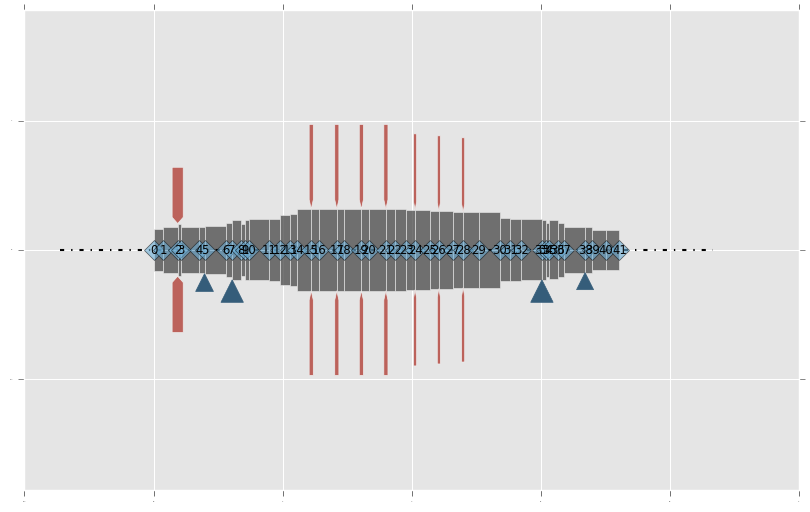

In [11]:
plot_rotor(compressor)

Diagrama de Campbell

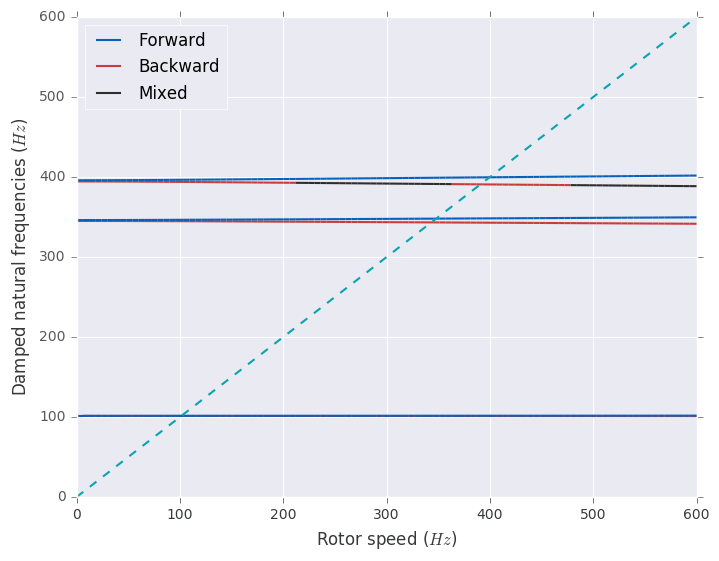

In [13]:
speed = np.linspace(0, 600, 100)
campbell(compressor, speed, mult=[1])

In [12]:
np.savetxt('M.txt', compressor.M())
np.savetxt('C.txt', compressor.C())
np.savetxt('G.txt', compressor.G())
np.savetxt('K.txt', compressor.K())

In [16]:
compressor.wn

array([ 101.3,  101.4,  345. ,  346.1,  394.4,  395.9,  395.9,  394.4,  346.1,  345. ,  101.4,  101.3])